In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

# Exploratory Data Analysis

In [2]:
# setting seaborn theme
sb.set_theme()

In [3]:
# reading in the dataset
data = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [4]:
# inspecting shape of dataset
data.shape

(64374, 12)

In [5]:
# creating nicer column headers
data.columns = [col.lower().replace(" ", "_") for col in  data.columns]
data.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [6]:
data.head()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [7]:
data.dtypes

customerid            int64
age                   int64
gender               object
tenure                int64
usage_frequency       int64
support_calls         int64
payment_delay         int64
subscription_type    object
contract_length      object
total_spend           int64
last_interaction      int64
churn                 int64
dtype: object

In [8]:
# observing distribution of target variable
data.churn.value_counts()

0    33881
1    30493
Name: churn, dtype: int64

In [9]:
data.churn.value_counts()/data.shape[0]

0    0.526315
1    0.473685
Name: churn, dtype: float64

In [10]:
# isolating target from input features
target = data.churn
features = data.iloc[:,1:-1] # removed customerid and churn

In [11]:
features.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,22,Female,25,14,4,27,Basic,Monthly,598,9
1,41,Female,28,28,7,13,Standard,Monthly,584,20
2,47,Male,27,10,2,29,Premium,Annual,757,21
3,35,Male,9,12,5,17,Premium,Quarterly,232,18
4,53,Female,58,24,9,2,Standard,Annual,533,18


## Visualizing Distributions of Input Features

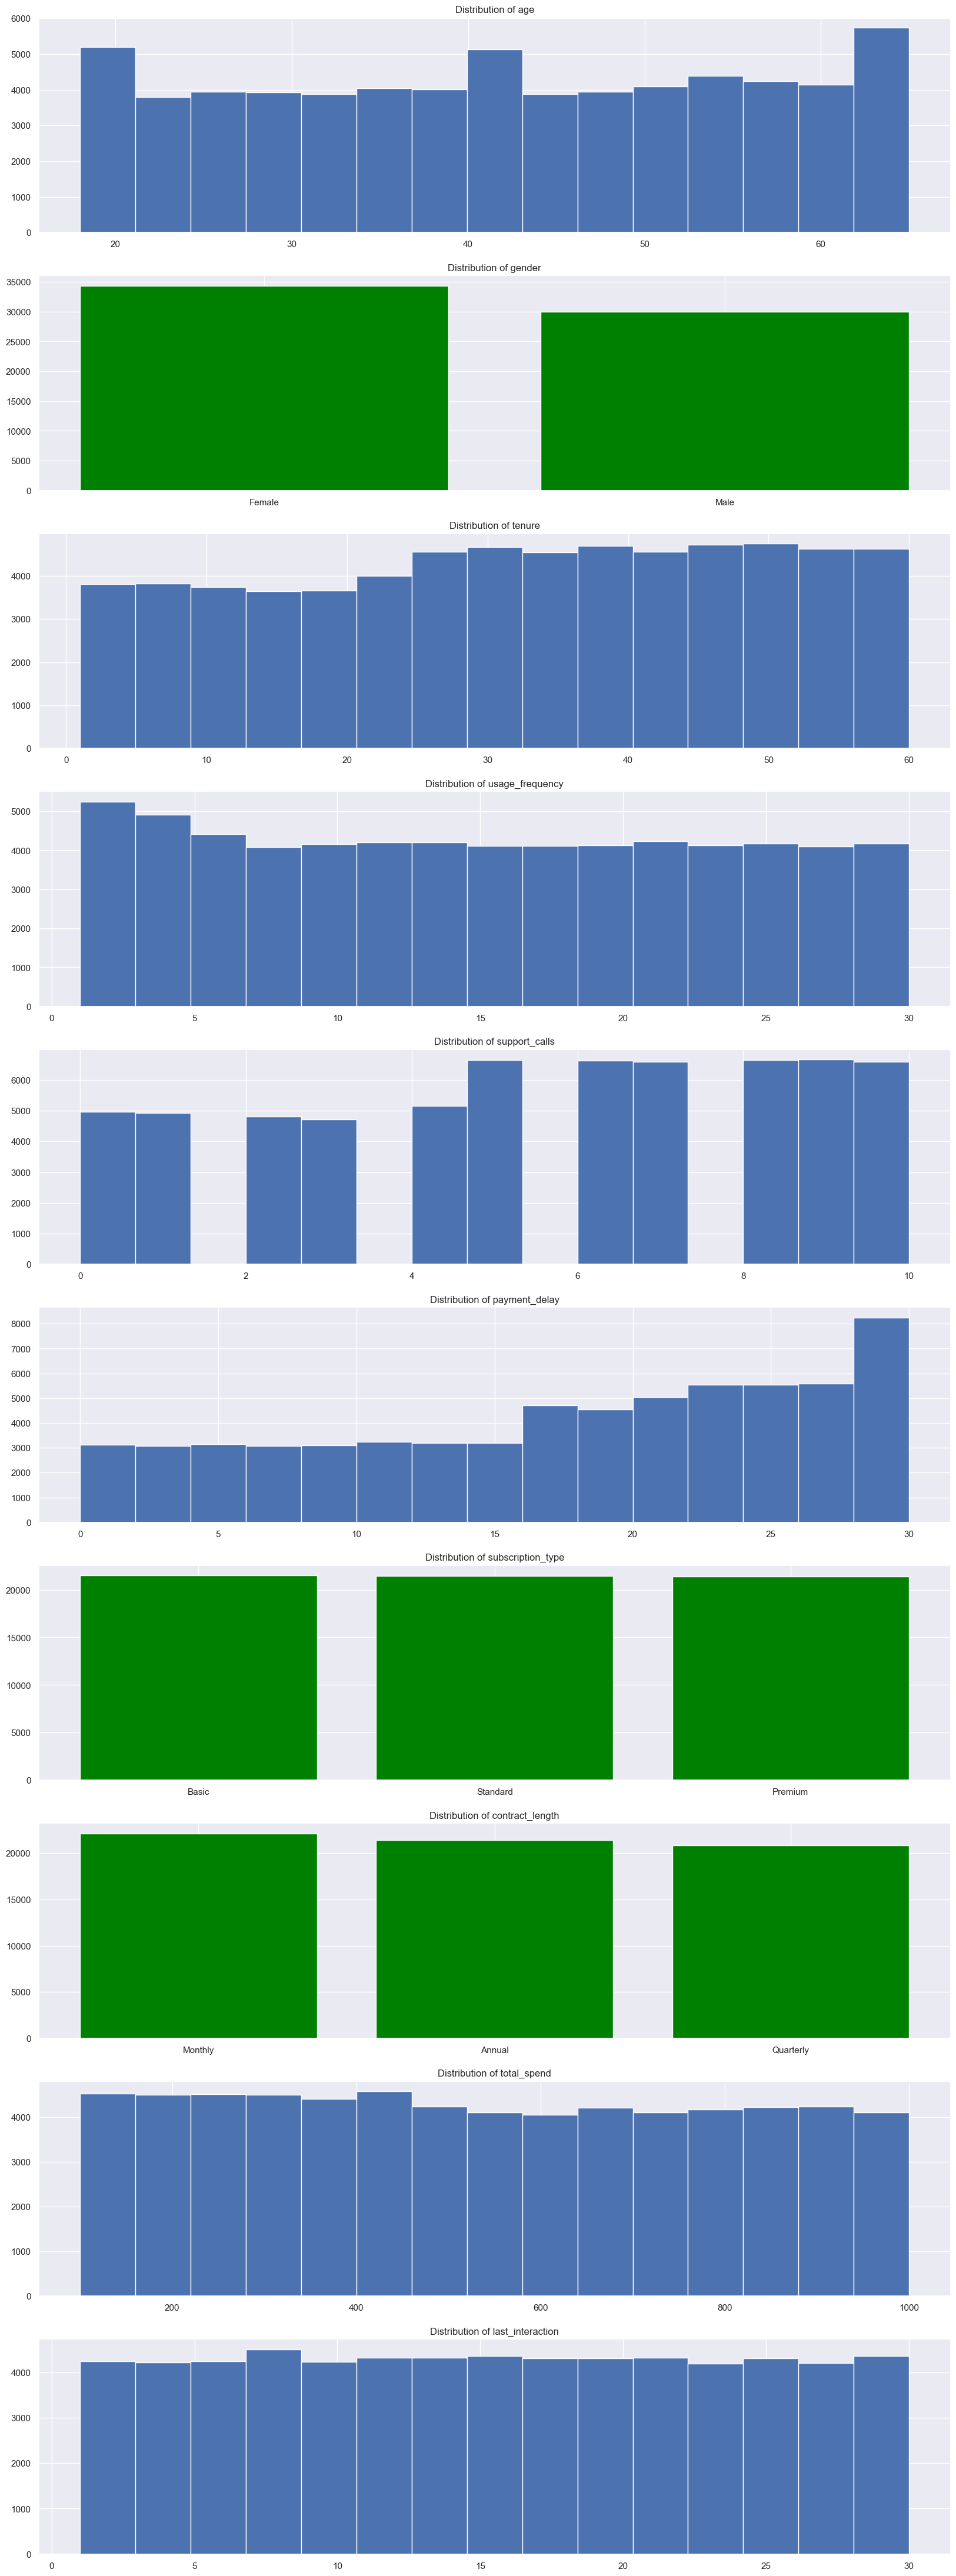

In [12]:
fig, ax = plt.subplots(features.shape[1], 1, figsize=(20, 56))

for i, feature in enumerate(features.columns):
    if features[feature].dtype == "int64":
        ax[i].hist(features[feature], bins=15)
    else:
        ax[i].bar(features[feature].unique(),
                  features[feature].value_counts(), color="green")

    ax[i].set_title(f"Distribution of {feature}")

# Preprocessing

In [13]:
# encoding categorical features
es_features = features.copy()
label_encoders = []

for feature in es_features:
    if es_features[feature].dtype == "O":
        print(f"Encoding: {feature}")
        le = LabelEncoder()
        es_features[feature] = le.fit_transform(es_features[feature])
        label_encoders.append(le)

# scaling numerical features
scaler = RobustScaler()
es_features[features.dtypes[features.dtypes != "object"].index] = scaler.fit_transform(
    es_features[features.dtypes[features.dtypes != "object"].index])

Encoding: gender
Encoding: subscription_type
Encoding: contract_length


In [14]:
es_features.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,-0.833333,0,-0.275862,-0.0625,-0.4,0.533333,0,1,0.140659,-0.400000
1,-0.041667,0,-0.172414,0.8125,0.2,-0.400000,2,1,0.109890,0.333333
2,0.208333,1,-0.206897,-0.3125,-0.8,0.666667,1,0,0.490110,0.400000
3,-0.291667,1,-0.827586,-0.1875,-0.2,-0.133333,1,2,-0.663736,0.200000
4,0.458333,0,0.862069,0.5625,0.6,-1.133333,2,0,-0.002198,0.200000


# Basic Modeling

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    es_features, target, test_size=0.2, random_state=39)

In [16]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
print(f"accuracy score: {metrics.accuracy_score(y_test, rfc.predict(X_test))}")
print(f"precision score: {metrics.precision_score(y_test, rfc.predict(X_test))}")
print(f"recall score: {metrics.recall_score(y_test, rfc.predict(X_test))}")
print(f"f1 score: {metrics.f1_score(y_test, rfc.predict(X_test))}")
print(f"roc auc score: {metrics.roc_auc_score(y_test, rfc.predict(X_test))}")

accuracy score: 0.9994563106796116
precision score: 0.9998359310910583
recall score: 0.9990163934426229
f1 score: 0.9994259942599426
roc auc score: 0.9994343959833042


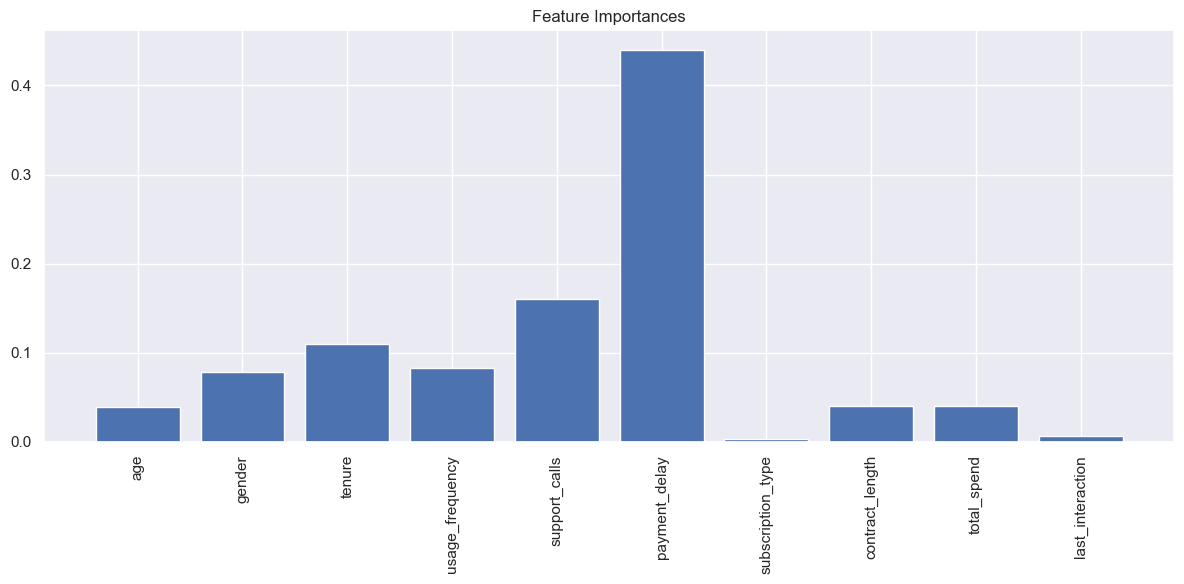

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(es_features.columns, rfc.feature_importances_)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Feature Importances")

plt.tight_layout()
plt.show()